# Шаг 1: Загрузка и первичный анализ данных


In [ ]:
1.1 Cкачайте датасет

In [2]:
# 1.1
import pandas as pd
import numpy as np

pollution_data = pd.read_csv('updated_pollution_dataset.csv')
pollution_data


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


1.2 Процесс выбора таргета

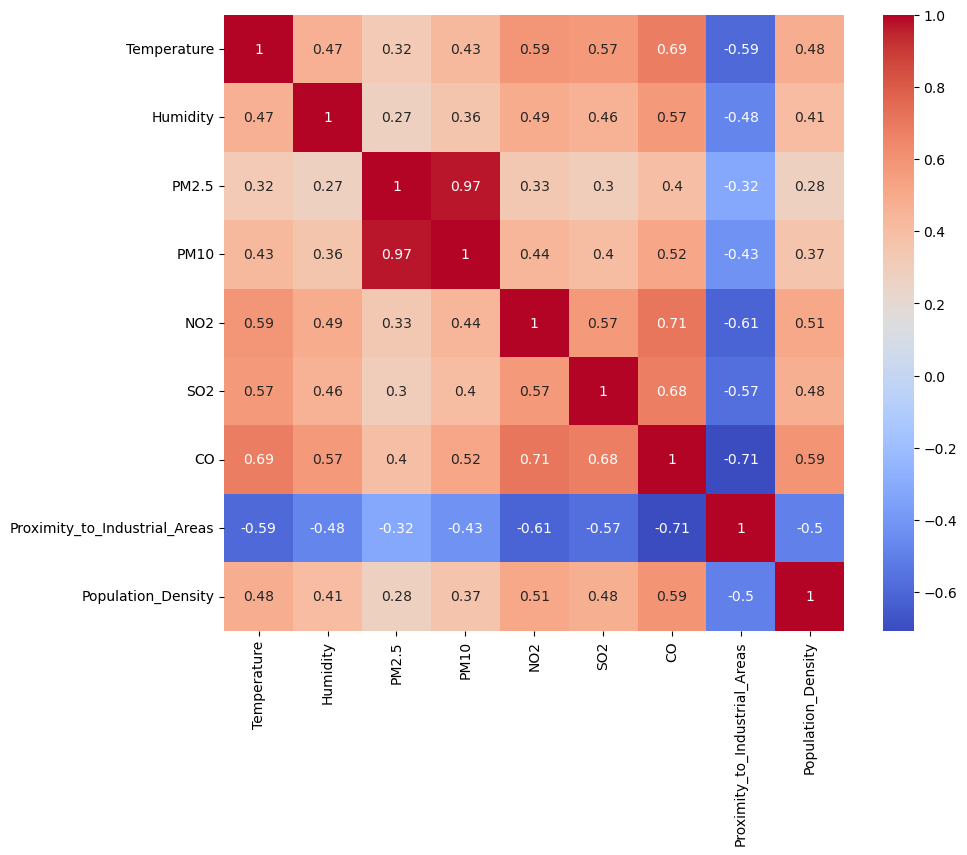

In [4]:
# 1.2 
import seaborn as sns
import matplotlib.pyplot as plt

# Допустим, pollution_data — это ваш DataFrame
numeric_df = pollution_data.select_dtypes(include=[float, int])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()



Результат: На основе тепловой карты мы выбрали Air Quality как таргет, так как он имеет сильную зависимость с ключевыми признаками (CO, NO2, PM10, и др.). Это обоснованный выбор для задачи предсказания качества воздуха.

1.3 Выведите количество строк и столбцов

In [5]:
# 1.3
pollution_data.shape

(5000, 10)

1.4 Проверьте типы данных каждого столбца, чтобы убедиться, что числовые колонки — это int или float, а категориальные — object. Так же точно определить категориальные кодировать их значения

In [6]:
# 1.4
pollution_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


1.5 Проверьте, нет ли пропущенных значений в датасете

In [6]:
# 1.5
missing_values = pollution_data.isna().sum()
print(missing_values)


Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


# Шаг 2: Анализ зависимости между переменными

In [ ]:
2.1
1. Кодирование значений целевой переменной Air Quality с использованием Label Encoding
2. Рассчет корреляции каждой переменной с целевой переменной

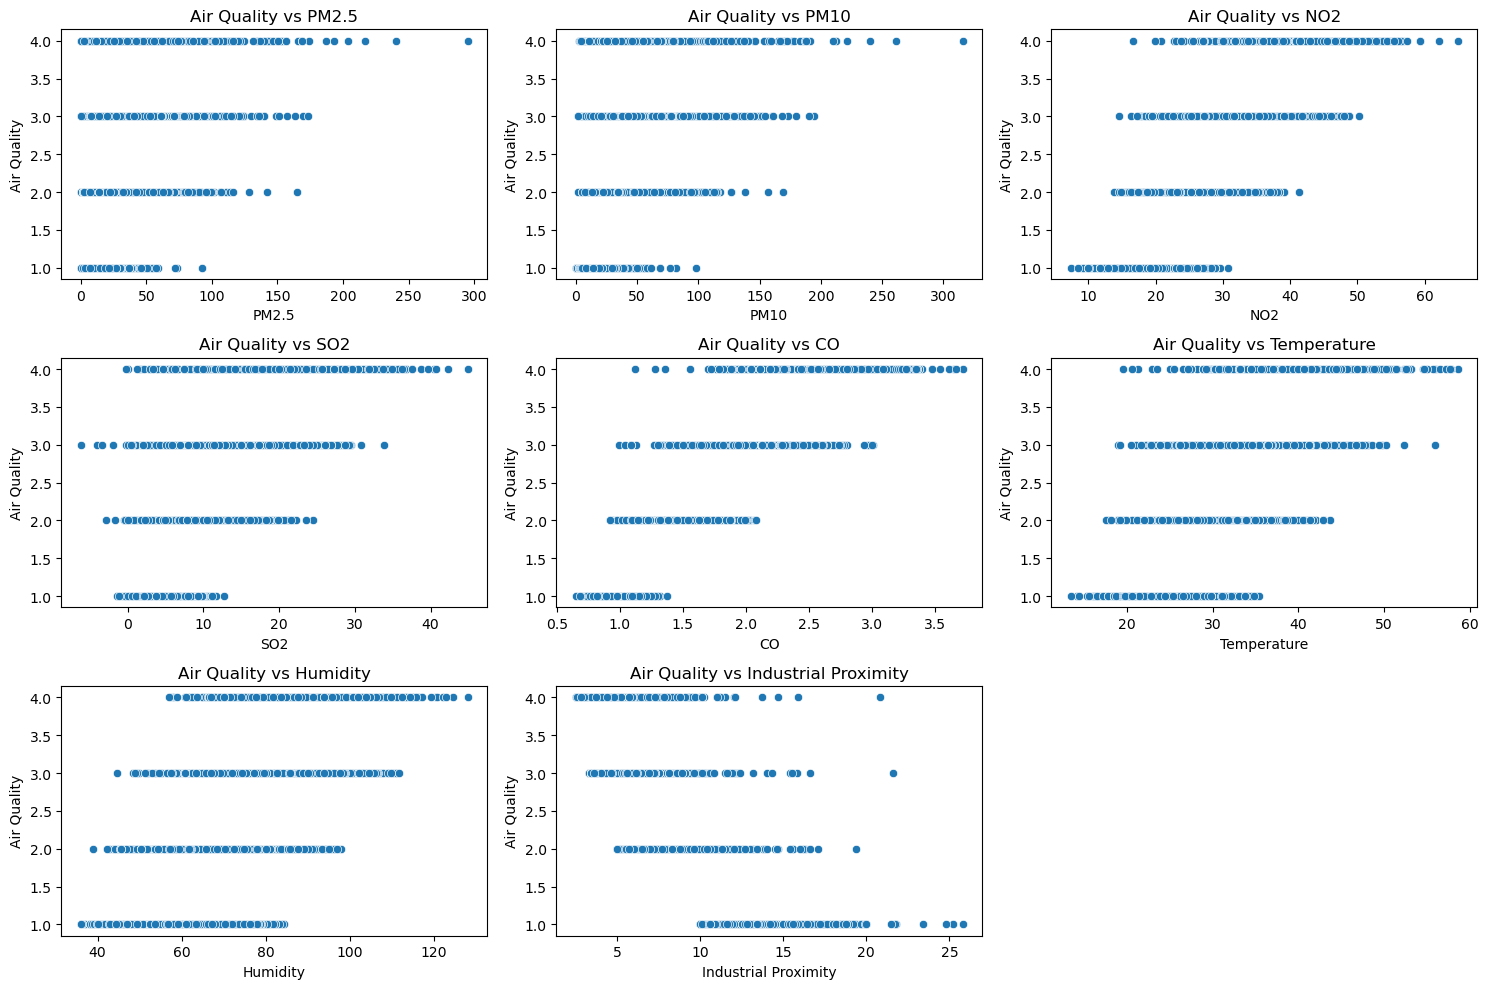

PM2.5                   0.418171
PM10                    0.555691
NO2                     0.785030
SO2                     0.740201
CO                      0.912534
Temperature             0.753567
Humidity                0.625546
Industrial Proximity   -0.773637
Name: Air Quality, dtype: float64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For advanced visualizations

# Clean up column names for consistency
pollution_data.columns = pollution_data.columns.str.strip()

# Encoding Air Quality into numerical values
air_quality_mapping = {
    'Good': 1,
    'Hazardous': 4,
    'Moderate': 2,
    'Poor': 3
}
pollution_data['Air Quality'] = pollution_data['Air Quality'].map(air_quality_mapping)

# Selecting relevant columns for analysis
columns = [
    'Air Quality',
    'PM2.5',
    'PM10',
    'NO2',
    'SO2',
    'CO',
    'Temperature',
    'Humidity',
    'Proximity_to_Industrial_Areas'
]

pollution_data_filtered = pollution_data[columns]

# Renaming columns for easier plotting
pollution_data_filtered.columns = [
    'Air Quality',
    'PM2.5',
    'PM10',
    'NO2',
    'SO2',
    'CO',
    'Temperature',
    'Humidity',
    'Industrial Proximity'
]

# Calculating correlations with Air Quality
correlations = pollution_data_filtered.corr()['Air Quality'][1:]

# Plotting scatter plots to visualize relationships
plt.figure(figsize=(15, 10))
for i, column in enumerate(pollution_data_filtered.columns[1:], start=1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=pollution_data_filtered, x=column, y='Air Quality')
    plt.title(f'Air Quality vs {column}')
    plt.xlabel(column)
    plt.ylabel('Air Quality')

plt.tight_layout()
plt.show()

# Displaying correlations to understand linearity
print(correlations)


# Шаг 3: Подготовка данных

3.1. Удаление лишних переменных
PM2.5 имеет низкую корреляцию, поэтому её стоит удалить:
pollution_data_filtered = pollution_data_filtered.drop(columns=['PM2.5'])

In [8]:
pollution_data_filtered = pollution_data_filtered.drop(columns=['PM2.5'])

In [9]:
# Проверяем данные после удаления колонки PM2.5
pollution_data_filtered 

,Air Quality,PM10,NO2,SO2,CO,Temperature,Humidity,Industrial Proximity
0,2,17.9,18.9,9.2,1.72,29.8,59.1,6.3
1,2,12.2,30.8,9.7,1.64,28.3,75.6,6.0
2,2,33.8,24.4,12.6,1.63,23.1,74.7,5.2
3,1,6.3,13.5,5.3,1.15,27.1,39.1,11.1
4,1,16.0,21.9,5.6,1.01,26.5,70.7,12.7
...,...,...,...,...,...,...,...,...
4995,4,126.7,45.5,25.7,2.11,40.6,74.1,2.8
4996,2,25.0,25.3,10.8,1.54,28.1,96.9,5.7
4997,2,22.1,34.8,7.8,1.63,25.9,78.2,9.6
4998,1,29.0,23.7,5.7,0.89,25.3,44.4,11.6


3.2. Разделение данных на фичи и целевую переменную:
1. Фичи (X): Остальные переменные.
2. Целевая переменная (y): Air Quality.

In [10]:
# 3.2
X = pollution_data_filtered.drop(columns=['Air Quality'])
y = pollution_data_filtered['Air Quality']


3.3 Числовуя характеристика признаков

In [11]:
# 3.3
pollution_data_filtered.describe()

,Air Quality,PM10,NO2,SO2,CO,Temperature,Humidity,Industrial Proximity
count,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.0000,30.218360,26.412100,10.014820,1.500354,30.029020,70.056120,8.425400
std,1.0001,27.349199,8.895356,6.750303,0.546027,6.720661,15.863577,3.610944
min,1.0000,-0.200000,7.400000,-6.200000,0.650000,13.400000,36.000000,2.500000
25%,1.0000,12.300000,20.100000,5.100000,1.030000,25.100000,58.300000,5.400000
50%,2.0000,21.700000,25.300000,8.000000,1.410000,29.000000,69.800000,7.900000
75%,3.0000,38.100000,31.900000,13.725000,1.840000,34.000000,80.300000,11.100000
max,4.0000,315.800000,64.900000,44.900000,3.720000,58.600000,128.100000,25.800000


# Шаг 4: Разделение данных на train и test

4.1 Разделите данные на обучающую и тестовую выборки (train и test) 🧩.

In [12]:
# 4.1 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (4000, 7), X_test: (1000, 7)
y_train: (4000,), y_test: (1000,)


4.2 Выведите числовую характеристику целевой переменной y_train и y_test с помощью метода .describe() 📊.

In [14]:
# 4.2
y_train.describe()

count    4000.000000
mean        2.000250
std         0.995237
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Air Quality, dtype: float64

In [15]:
y_test.describe()

count    1000.000000
mean        1.999000
std         1.019823
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Air Quality, dtype: float64

# Шаг 4: Выбор модели

4.1. Сравнение моделей (CatBoost и XGBoost)

In [13]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Разделение данных на тренировочные и тестовые выборки
X = pollution_data_filtered.drop(columns=['Air Quality'])
y = pollution_data_filtered['Air Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель CatBoostRegressor
catboost_reg = CatBoostRegressor(
    iterations=100,
    depth=5,
    learning_rate=0.1,
    random_seed=42,
    verbose=False
)
catboost_reg.fit(X_train, y_train)
y_pred_cat = catboost_reg.predict(X_test)
mse_cat = mean_squared_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)

# Модель XGBRegressor
xgb_reg = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Сравнение метрик
print("CatBoostRegressor: MSE =", mse_cat, ", R² =", r2_cat)
print("XGBRegressor: MSE =", mse_xgb, ", R² =", r2_xgb)


CatBoostRegressor: MSE = 0.042641499441054935 , R² = 0.9589590563214643
XGBRegressor: MSE = 0.03930230708996308 , R² = 0.9621729115331554


4.2 Настройка гиперпараметров

In [14]:
from sklearn.model_selection import GridSearchCV

# Определяем сетку гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Инициализация модели
xgb_reg = XGBRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Лучшая модель
best_model = grid_search.best_estimator_
print("Лучшие параметры:", grid_search.best_params_)

# Оценка на тестовой выборке
y_pred_best = best_model.predict(X_test)
print("R² для лучшей модели:", r2_score(y_test, y_pred_best))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
R² для лучшей модели: 0.9621729115331554


In [15]:
# 4.3 Средний R² на кросс-валидации
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
print("Средний R² на кросс-валидации:", cv_scores.mean())


Средний R² на кросс-валидации: 0.9534252952550041


In [16]:
# 4.4 RMSE
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred_best))
print("RMSE:", rmse)


RMSE: 0.19824809479529198


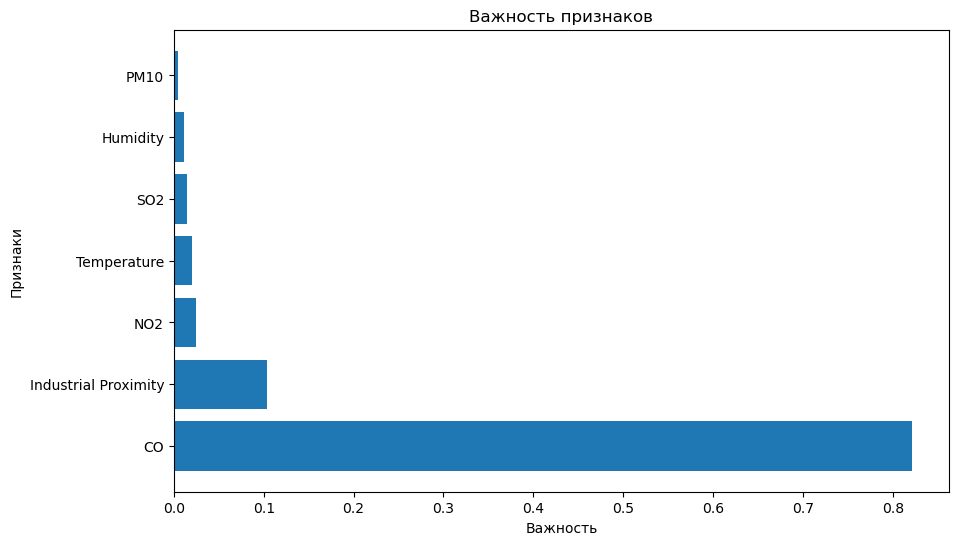

In [17]:
# 4.5 Важность признаков
import matplotlib.pyplot as plt
import numpy as np

feature_importances = best_model.feature_importances_

# Сортировка индексов признаков по убыванию важности
indices = np.argsort(feature_importances)[::-1]

# Создание списка имен отсортированных признаков
names = [X_train.columns[i] for i in indices]

# Визуализация
plt.figure(figsize=(10,6))
plt.barh(range(X_train.shape[1]), feature_importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), names)
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.title('Важность признаков')
plt.show()


In [18]:
# 4.6 Объединение данныех и обучение 
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Объединение данных для полного обучения
X_full = pd.concat([X_train, X_test], axis=0)
y_full = pd.concat([y_train, y_test], axis=0)

# Используем лучшие параметры, найденные с помощью GridSearchCV
best_params = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

# Создаем модель с оптимальными гиперпараметрами
final_model = XGBRegressor(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)

# Обучение модели на полном наборе данных
final_model.fit(X_full, y_full)

# Сохранение модели для использования в будущем
joblib.dump(final_model, "final_xgb_model.pkl")
print("Модель обучена на полном наборе данных и сохранена как 'final_xgb_model.pkl'.")

# Оценка модели на полном наборе данных (по желанию)
y_full_pred = final_model.predict(X_full)
mse_full = mean_squared_error(y_full, y_full_pred)
r2_full = r2_score(y_full, y_full_pred)

print("Оценка модели на полном наборе данных:")
print(f"Mean Squared Error (MSE): {mse_full:.4f}")
print(f"R² Score: {r2_full:.4f}")


Модель обучена на полном наборе данных и сохранена как 'final_xgb_model.pkl'.
Оценка модели на полном наборе данных:
Mean Squared Error (MSE): 0.0170
R² Score: 0.9830


In [19]:
import joblib

# 4.7 Сохранение модели
joblib.dump(best_model, "xgb_regressor.pkl")

# Загрузка модели (проверка)
loaded_model = joblib.load("xgb_regressor.pkl")


In [20]:
pollution_data_filtered.describe()

,Air Quality,PM10,NO2,SO2,CO,Temperature,Humidity,Industrial Proximity
count,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.0000,30.218360,26.412100,10.014820,1.500354,30.029020,70.056120,8.425400
std,1.0001,27.349199,8.895356,6.750303,0.546027,6.720661,15.863577,3.610944
min,1.0000,-0.200000,7.400000,-6.200000,0.650000,13.400000,36.000000,2.500000
25%,1.0000,12.300000,20.100000,5.100000,1.030000,25.100000,58.300000,5.400000
50%,2.0000,21.700000,25.300000,8.000000,1.410000,29.000000,69.800000,7.900000
75%,3.0000,38.100000,31.900000,13.725000,1.840000,34.000000,80.300000,11.100000
max,4.0000,315.800000,64.900000,44.900000,3.720000,58.600000,128.100000,25.800000


In [21]:
# 4.8 Проверка и тестирование
import pandas as pd
import joblib

# Загрузка обученной модели
loaded_model = joblib.load("xgb_regressor.pkl")

# Пример новых данных (на основе предоставленных вами данных)
new_data = pd.DataFrame({
    'PM10': [17.9],
    'NO2': [18.9],
    'SO2': [9.2],
    'CO': [1.72],
    'Temperature': [29.8],
    'Humidity': [59.1],
    'Industrial Proximity': [6.3]
})

# Предсказание качества воздуха
prediction = loaded_model.predict(new_data)
print("Прогнозируемое качество воздуха (Air Quality):", prediction[0])

# Словарь для обратного преобразования
reverse_mapping = {1: 'Good', 2: 'Moderate', 3: 'Poor', 4: 'Hazardous'}

# Округление до ближайшей категории
predicted_category = round(prediction[0])
predicted_label = reverse_mapping[predicted_category]

print(f"Прогнозируемое качество воздуха: {predicted_label}")



Прогнозируемое качество воздуха (Air Quality): 1.9740813
Прогнозируемое качество воздуха: Moderate


In [22]:
import joblib
joblib.dump(best_model, "xgb_regressor.pkl")


['xgb_regressor.pkl']